In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Infrared_Thermography_Temperature.csv')


In [ ]:
df.head()

,SubjectID,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,161117-1,36.85,36.59,Male,41-50,White,24.0,28.0,0.8,0.7025,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,161117-2,37.00,37.19,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,161117-3,37.20,37.34,Female,21-30,White,24.0,26.0,0.8,0.8625,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,161117-4,36.85,37.09,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,161117-5,36.80,37.04,Male,18-20,White,24.0,27.0,0.8,0.8950,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


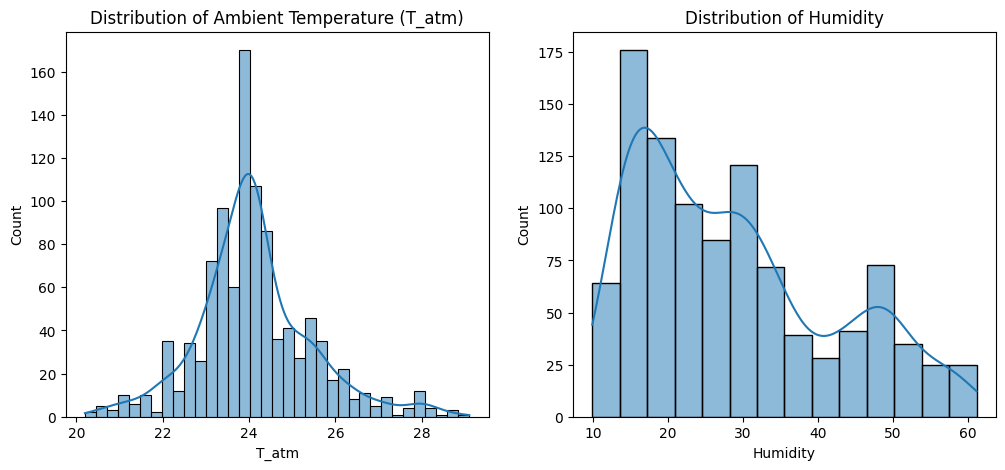

In [ ]:
import seaborn as sns

# Histogram for Ambient Temperature and Humidity
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['T_atm'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of Ambient Temperature (T_atm)')
sns.histplot(df['Humidity'], kde=True, ax=axs[1])
axs[1].set_title('Distribution of Humidity')
plt.show()


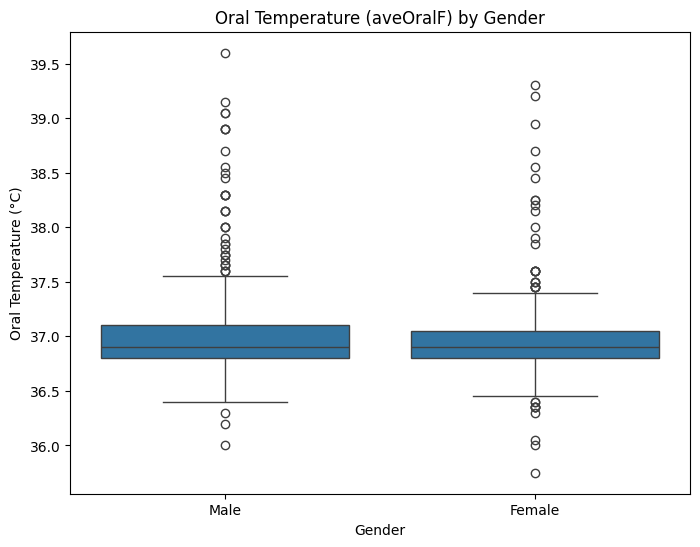

In [ ]:
# Boxplot of Oral Temperature by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='aveOralF', data=df)
plt.title('Oral Temperature (aveOralF) by Gender')
plt.ylabel('Oral Temperature (°C)')
plt.show()


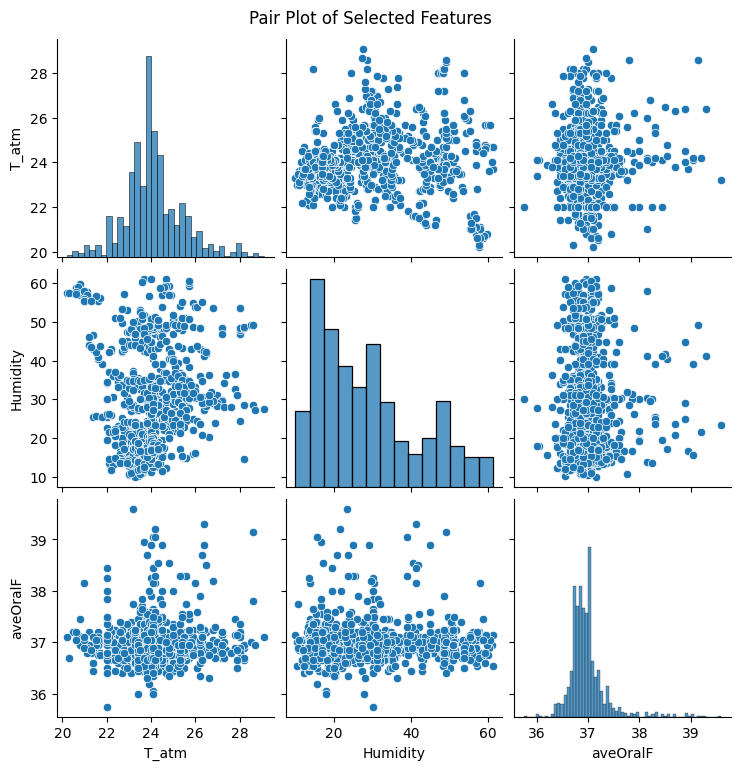

In [ ]:
# Pair plot for selected continuous features
sns.pairplot(df, vars=['T_atm', 'Humidity', 'aveOralF'])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


# Preprocessing

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

SubjectID      0
aveOralF       0
aveOralM       0
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64
          aveOralF     aveOralM        T_atm     Humidity     Distance  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1018.000000   
mean     36.979216    37.028382    24.115392    28.723039     0.729784   
std       0.386403     0.509502     1.336338    13.071627     2.456486   
min      35.750000    35.540000    20.200000     9.900000     0.540000   
25%  

In [ ]:
df['Distance'].fillna(df['Distance'].mean(), inplace=True)

<ipython-input-4-737abdb21d24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance'].fillna(df['Distance'].mean(), inplace=True)


In [ ]:
# Check for missing values
print(df.isnull().sum())

SubjectID      0
aveOralF       0
aveOralM       0
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Age', 'Ethnicity']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le




In [ ]:
# Select continuous variables and scale them
continuous_features = ['T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
                       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
                       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
                       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
                       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
                       'T_OR_Max1']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [ ]:
df.columns

Index(['SubjectID', 'aveOralF', 'aveOralM', 'Gender', 'Age', 'Ethnicity',
       'T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
       'T_OR_Max1'],
      dtype='object')

In [ ]:
df

,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,36.85,36.59,1,5,5,-0.086392,-0.055341,0.028626,-0.734385,-0.985950,...,-1.482397,-1.629520,-1.758493,-1.490408,-2.162224,-1.703974,-1.887314,-0.798009,-0.305051,-0.332313
1,37.00,37.19,0,4,2,-0.086392,-0.208419,0.028626,-0.520538,-1.821305,...,-0.805446,-0.766397,-1.308860,-0.775307,-0.789203,-1.412510,-0.754033,-1.850738,-1.275562,-1.307195
2,37.20,37.34,0,2,5,-0.086392,-0.208419,0.028626,-0.292895,0.097401,...,0.485225,0.388171,0.121121,0.497649,0.127288,-0.146314,0.222933,-0.350472,0.097465,0.083577
3,36.85,37.09,0,2,2,-0.086392,-0.131880,0.028626,-0.106642,-0.650938,...,-0.199165,-0.217136,0.132178,-0.277356,0.467111,0.345830,0.383589,-0.742067,-1.503654,-1.530792
4,36.80,37.04,1,0,5,-0.086392,-0.131880,0.028626,-0.203217,-0.089684,...,0.767908,0.885121,-0.247431,0.273010,-1.029482,-0.007750,0.483457,-0.386072,-0.390027,-0.394920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,36.95,36.99,0,1,1,1.186366,1.689751,-0.052911,0.700457,0.079998,...,0.793944,1.165356,1.230462,0.973136,0.957966,0.823639,1.134768,-0.035162,-0.229020,-0.229459
1016,37.25,37.19,0,1,5,1.186366,1.689751,-0.052911,1.376488,0.671708,...,1.095225,0.971060,0.965105,1.077968,0.676496,0.656406,0.796086,0.844654,1.157423,1.165786
1017,37.35,37.59,0,0,2,2.908332,-0.338535,-0.052911,-2.314091,1.411345,...,1.281200,1.004688,0.976161,1.317583,1.050645,1.822262,1.069637,0.915853,0.285305,0.284814
1018,37.15,37.29,1,3,3,0.662289,0.847821,-0.052911,0.762542,0.380204,...,0.395957,0.675879,0.530214,0.340402,0.024312,-0.012528,0.374905,-0.457271,-0.698622,-0.721372


In [ ]:
df = df.drop(['SubjectID'], axis=1)

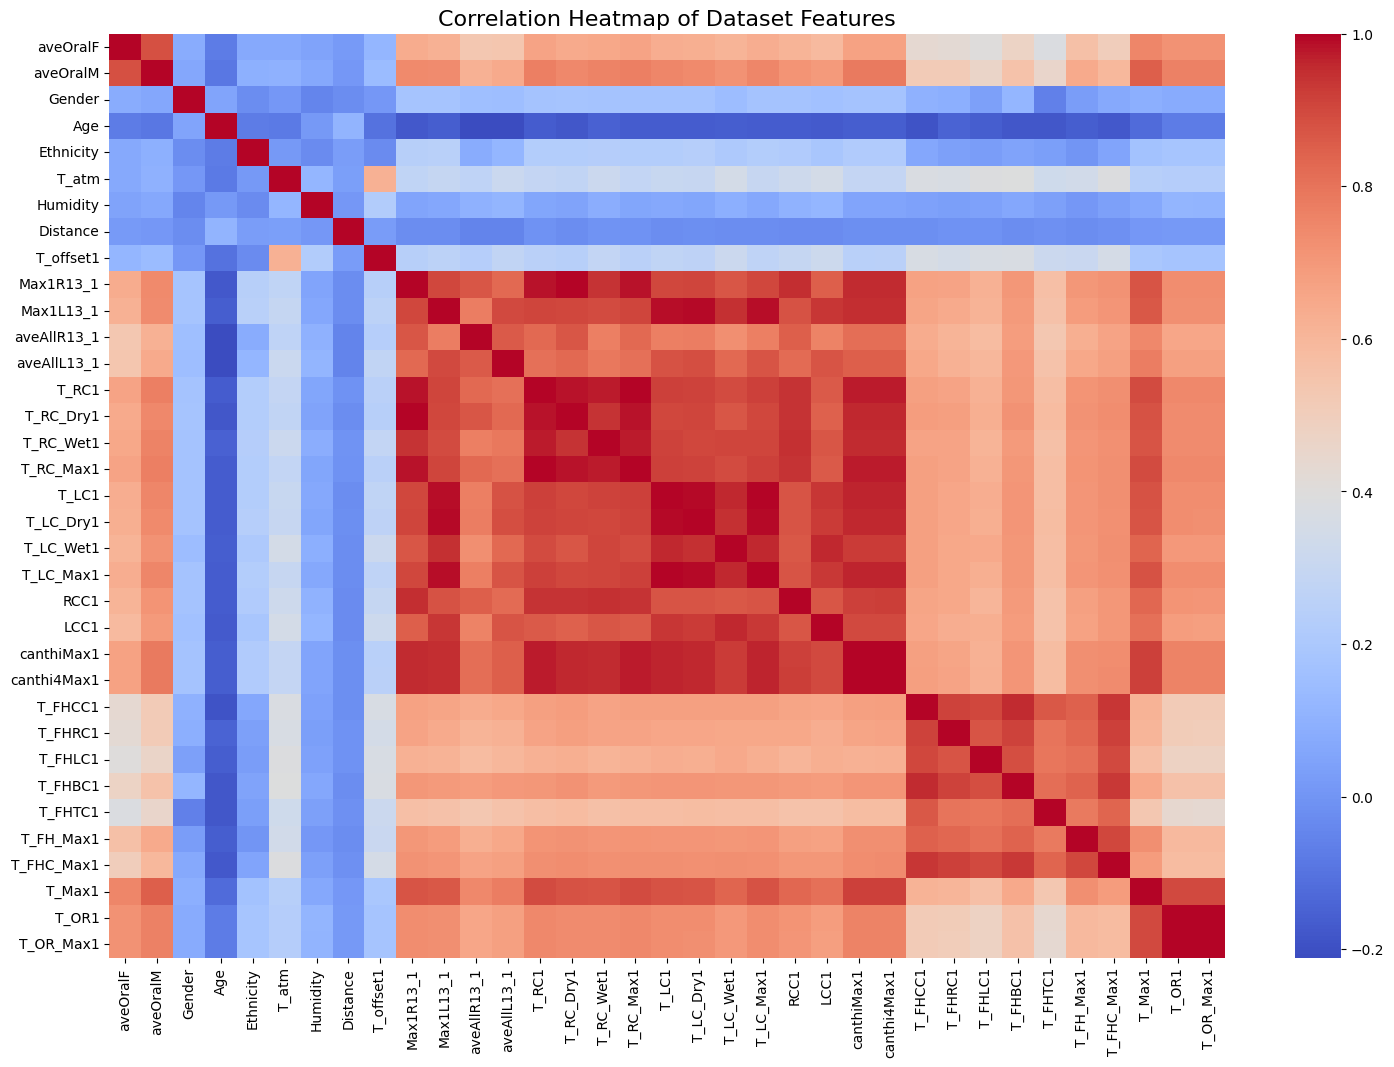

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(18, 12))
correlation_matrix = df.corr()  # Compute pairwise correlation of features
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Dataset Features', fontsize=16)
plt.show()

In [ ]:
correlation_matrix

,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
aveOralF,1.000000,0.884728,0.077565,-0.078660,0.070308,0.070825,0.047200,0.016157,0.117794,0.637134,...,0.433403,0.425942,0.399649,0.472456,0.382936,0.560117,0.502194,0.752546,0.718840,0.718513
aveOralM,0.884728,1.000000,0.058844,-0.090291,0.095198,0.098663,0.063595,0.011176,0.139041,0.741902,...,0.513335,0.514298,0.463579,0.552362,0.454889,0.641727,0.595470,0.849657,0.767345,0.766911
Gender,0.077565,0.058844,1.000000,0.053370,-0.023959,0.010205,-0.048064,-0.023434,0.008441,0.180279,...,0.098502,0.089878,0.037092,0.115645,-0.062742,0.028111,0.069970,0.088181,0.073507,0.073478
Age,-0.078660,-0.090291,0.053370,1.000000,-0.077364,-0.079006,0.015842,0.107555,-0.104190,-0.174081,...,-0.190081,-0.149577,-0.162775,-0.182465,-0.180336,-0.159682,-0.177501,-0.123141,-0.076376,-0.076828
Ethnicity,0.070308,0.095198,-0.023959,-0.077364,1.000000,0.013434,-0.026649,0.027854,-0.028943,0.239706,...,0.062999,0.037057,0.030039,0.048733,0.032211,0.000493,0.052348,0.168876,0.182394,0.182265
T_atm,0.070825,0.098663,0.010205,-0.079006,0.013434,1.000000,0.119270,0.033376,0.616912,0.275363,...,0.380148,0.368740,0.388760,0.393838,0.329755,0.339329,0.389521,0.242280,0.233001,0.230146
Humidity,0.047200,0.063595,-0.048064,0.015842,-0.026649,0.119270,1.000000,0.008460,0.224086,0.050884,...,0.043393,0.033311,0.040234,0.061012,0.036980,0.006943,0.038868,0.064231,0.111888,0.110408
Distance,0.016157,0.011176,-0.023434,0.107555,0.027854,0.033376,0.008460,1.000000,0.024825,-0.024478,...,-0.018600,-0.008928,-0.009549,-0.022821,-0.014061,-0.022372,-0.012933,0.007897,0.013630,0.014241
T_offset1,0.117794,0.139041,0.008441,-0.104190,-0.028943,0.616912,0.224086,0.024825,1.000000,0.239208,...,0.367158,0.348724,0.368220,0.371284,0.317587,0.304540,0.355541,0.191369,0.181496,0.177910
Max1R13_1,0.637134,0.741902,0.180279,-0.174081,0.239706,0.275363,0.050884,-0.024478,0.239208,1.000000,...,0.673311,0.665614,0.617565,0.702868,0.566860,0.703221,0.720179,0.873412,0.734474,0.733324


In [ ]:
df.columns

Index(['aveOralF', 'aveOralM', 'Gender', 'Age', 'Ethnicity', 'T_atm',
       'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
       'T_OR_Max1'],
      dtype='object')

In [ ]:
# Separate features and target variables
X = df.drop(['aveOralF', 'aveOralM', 'Age', 'Gender', 'Ethnicity', 'T_atm', 'Humidity', 'Distance'], axis=1)
y = df['aveOralF']  # Choosing 'aveOralF' as the target; adjust as needed

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(816, 27)

# Model

In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Train CNN Model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=50, validation_data=(X_test_cnn, y_test), batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1146.9359 - mae: 33.5444 - val_loss: 430.9042 - val_mae: 19.3804
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 338.9719 - mae: 16.0455 - val_loss: 198.5795 - val_mae: 12.2609
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 186.3946 - mae: 11.5472 - val_loss: 88.8079 - val_mae: 8.2188
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 93.5746 - mae: 7.4269 - val_loss: 32.7865 - val_mae: 4.5449
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 36.3198 - mae: 4.2368 - val_loss: 13.7287 - val_mae: 3.0216
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.5693 - mae: 2.7598 - val_loss: 8.5742 - val_mae: 2.5128
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7610 - mae: 2.1166 - val_loss: 4.4110 - val_mae: 1.7757
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4981 - mae: 1.5964 - val_loss: 2.4520 - val_mae: 1.2752
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2

In [ ]:
# Evaluate CNN Model
cnn_preds = cnn_model.predict(X_test_cnn)

# Ensure y_test is converted to a Numpy array and has the correct shape
y_test_array = y_test.to_numpy().reshape(-1)  # Flatten to 1D array if needed
cnn_preds = cnn_preds.reshape(-1)  # Flatten predictions to 1D array

# Calculate evaluation metrics
mae = np.mean(np.abs(cnn_preds - y_test_array))          # Mean Absolute Error
mse = np.mean((cnn_preds - y_test_array) ** 2)           # Mean Squared Error
rmse = np.sqrt(mse)                                      # Root Mean Squared Error

# Display CNN Model Performance
print("CNN Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
CNN Model Performance:
Mean Absolute Error (MAE): 0.31793363234576066
Mean Squared Error (MSE): 0.2750808789666776
Root Mean Squared Error (RMSE): 0.5244815334849051


In [ ]:
print("Actual Temperature : ", y_test_array)
print("Predict Temperature : ", cnn_preds)

Actual Temperature :  [36.9  36.75 36.75 36.65 36.8  36.75 37.5  37.2  37.   37.2  37.1  36.65
 37.2  36.55 36.95 36.9  37.35 37.2  36.9  36.95 36.9  36.95 36.9  37.2
 36.85 36.8  37.1  36.6  36.85 36.85 37.25 36.45 37.15 37.75 36.95 37.25
 36.9  36.6  36.7  36.85 36.9  36.5  37.55 36.7  36.3  36.95 37.2  37.05
 37.   36.7  36.65 38.9  37.45 37.05 37.   36.8  36.85 36.9  37.05 36.85
 38.25 37.   37.25 36.85 36.95 37.4  37.05 36.85 36.75 36.95 37.   36.85
 36.85 37.   36.65 36.95 36.   36.8  36.75 36.9  37.1  37.3  37.05 37.2
 36.65 37.25 37.4  38.55 37.   37.1  36.65 37.   36.85 36.8  36.8  37.75
 37.2  37.   36.6  36.8  36.5  36.65 36.5  37.2  36.75 36.95 36.7  36.6
 36.8  37.05 37.2  36.8  36.8  36.85 36.95 37.   36.4  38.   37.05 36.95
 37.2  36.6  37.1  37.2  36.75 37.6  37.85 36.55 36.9  37.55 36.65 36.65
 38.15 36.65 37.1  36.9  37.   37.05 36.8  36.65 37.15 36.7  36.95 36.8
 36.7  36.95 37.1  37.1  36.9  36.95 36.85 36.8  36.7  36.95 36.7  37.65
 37.15 36.95 36.9  37.05 37.05 36

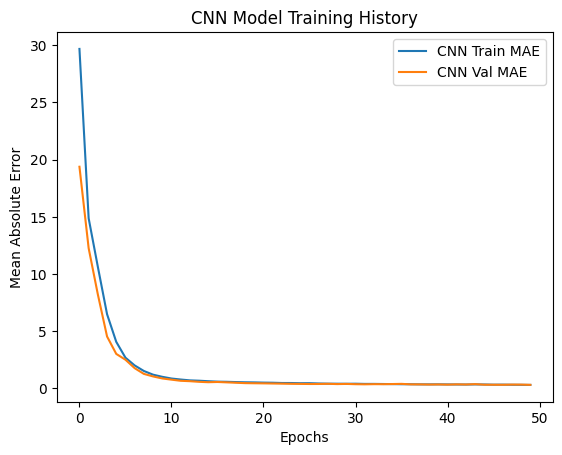

In [ ]:
# Plot CNN Training History
plt.plot(cnn_history.history['mae'], label='CNN Train MAE')
plt.plot(cnn_history.history['val_mae'], label='CNN Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('CNN Model Training History')
plt.show()

# RNN Model

In [ ]:
# RNN Model
rnn_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape data for RNN
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# Train RNN Model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=50, validation_data=(X_test_rnn, y_test), batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1348.9888 - mae: 36.7250 - val_loss: 1284.5865 - val_mae: 35.8318
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1325.1544 - mae: 34.7035 - val_loss: 348.7156 - val_mae: 16.1985
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 128.4683 - mae: 8.1992 - val_loss: 7.3748 - val_mae: 1.8433
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.7390 - mae: 1.6389 - val_loss: 1.5089 - val_mae: 1.0122
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3930 - mae: 0.8238 - val_loss: 0.5329 - val_mae: 0.4832
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4410 - mae: 0.4639 - val_loss: 0.3542 - val_mae: 0.3897
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2430 - mae: 0.3640 - val_loss: 0.2616 - val_mae: 0.3705
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2273 - mae: 0.3350 - val_loss: 0.2149 - val_mae: 0.3240
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

In [ ]:
# Evaluate RNN Model
rnn_preds = rnn_model.predict(X_test_rnn)

y_test_array = y_test.to_numpy().reshape(-1)  # Flatten to 1D array if needed
rnn_preds = rnn_preds.reshape(-1)


# Calculate evaluation metrics
mae = np.mean(np.abs(rnn_preds - y_test_array))         # Mean Absolute Error
mse = np.mean((rnn_preds - y_test_array) ** 2)          # Mean Squared Error
rmse = np.sqrt(mse)                                     # Root Mean Squared Error

# Display RNN Model Performance
print("RNN Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
RNN Model Performance:
Mean Absolute Error (MAE): 0.3177832285563153
Mean Squared Error (MSE): 0.1415394469553563
Root Mean Squared Error (RMSE): 0.3762172868906429


In [ ]:
print("Actual Temperature : ", y_test_array)
print("Predict Temperature : ", rnn_preds)

Actual Temperature :  [36.9  36.75 36.75 36.65 36.8  36.75 37.5  37.2  37.   37.2  37.1  36.65
 37.2  36.55 36.95 36.9  37.35 37.2  36.9  36.95 36.9  36.95 36.9  37.2
 36.85 36.8  37.1  36.6  36.85 36.85 37.25 36.45 37.15 37.75 36.95 37.25
 36.9  36.6  36.7  36.85 36.9  36.5  37.55 36.7  36.3  36.95 37.2  37.05
 37.   36.7  36.65 38.9  37.45 37.05 37.   36.8  36.85 36.9  37.05 36.85
 38.25 37.   37.25 36.85 36.95 37.4  37.05 36.85 36.75 36.95 37.   36.85
 36.85 37.   36.65 36.95 36.   36.8  36.75 36.9  37.1  37.3  37.05 37.2
 36.65 37.25 37.4  38.55 37.   37.1  36.65 37.   36.85 36.8  36.8  37.75
 37.2  37.   36.6  36.8  36.5  36.65 36.5  37.2  36.75 36.95 36.7  36.6
 36.8  37.05 37.2  36.8  36.8  36.85 36.95 37.   36.4  38.   37.05 36.95
 37.2  36.6  37.1  37.2  36.75 37.6  37.85 36.55 36.9  37.55 36.65 36.65
 38.15 36.65 37.1  36.9  37.   37.05 36.8  36.65 37.15 36.7  36.95 36.8
 36.7  36.95 37.1  37.1  36.9  36.95 36.85 36.8  36.7  36.95 36.7  37.65
 37.15 36.95 36.9  37.05 37.05 36

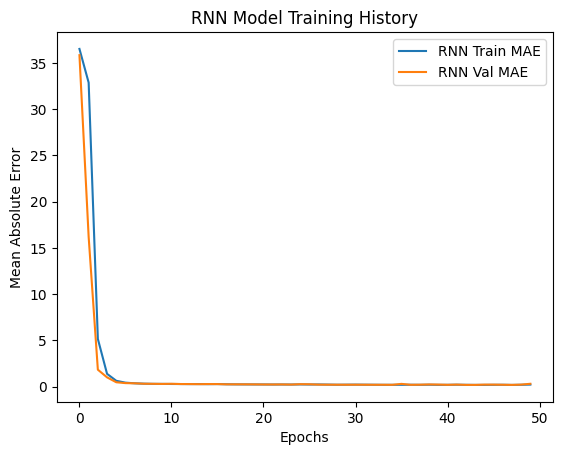

In [ ]:
# Plot RNN Training History
plt.plot(rnn_history.history['mae'], label='RNN Train MAE')
plt.plot(rnn_history.history['val_mae'], label='RNN Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('RNN Model Training History')
plt.show()

# GRU Model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Define the GRU Model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape data for GRU
X_train_gru = np.expand_dims(X_train, axis=2)
X_test_gru = np.expand_dims(X_test, axis=2)

# Train GRU Model
gru_history = gru_model.fit(X_train_gru, y_train, epochs=50, validation_data=(X_test_gru, y_test), batch_size=32)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1360.5980 - mae: 36.8844 - val_loss: 1338.9948 - val_mae: 36.5905
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1317.4071 - mae: 36.2801 - val_loss: 690.0590 - val_mae: 24.0956
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 297.0671 - mae: 13.5945 - val_loss: 3.4067 - val_mae: 1.6105
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2472 - mae: 1.5003 - val_loss: 0.4844 - val_mae: 0.5013
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4250 - mae: 0.4762 - val_loss: 0.2544 - val_mae: 0.3928
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2757 - mae: 0.3974 - val_loss: 0.2255 - val_mae: 0.3826
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2501 - mae: 0.3846 - val_loss: 0.2040 - val_mae: 0.3535
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2172 - mae: 0.3522 - val_loss: 0.1816 - val_mae: 0.3325
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
GRU Model Performance:
Mean Absolute Error (MAE): 0.18717998429840715
Mean Squared Error (MSE): 0.05795333487248774
Root Mean Squared Error (RMSE): 0.2407349888829784


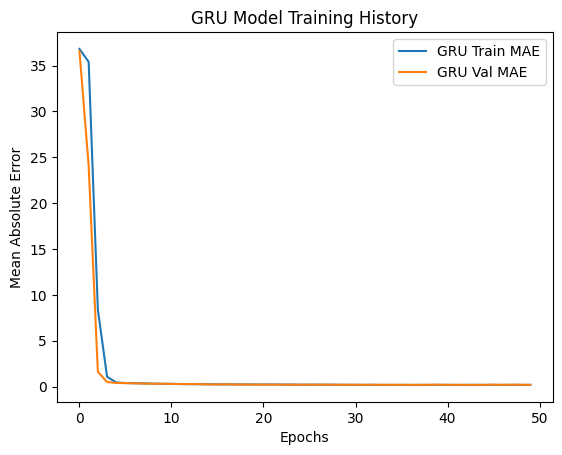

In [ ]:
# Evaluate GRU Model
gru_preds = gru_model.predict(X_test_gru)

# Ensure y_test is a Numpy array and reshape if necessary
y_test_array = y_test.to_numpy().reshape(-1)  # Flatten to 1D array if needed
gru_preds = gru_preds.reshape(-1)  # Flatten predictions to 1D array


# Calculate evaluation metrics
mae = np.mean(np.abs(gru_preds - y_test_array))
mse = np.mean((gru_preds - y_test_array) ** 2)
rmse = np.sqrt(mse)


# Display GRU Model Performance
print("GRU Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot GRU Training History
plt.plot(gru_history.history['mae'], label='GRU Train MAE')
plt.plot(gru_history.history['val_mae'], label='GRU Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('GRU Model Training History')
plt.show()


In [ ]:
print("Actual Temperature : ", y_test_array)
print("Predict Temperature : ", gru_preds)

Actual Temperature :  [36.9  36.75 36.75 36.65 36.8  36.75 37.5  37.2  37.   37.2  37.1  36.65
 37.2  36.55 36.95 36.9  37.35 37.2  36.9  36.95 36.9  36.95 36.9  37.2
 36.85 36.8  37.1  36.6  36.85 36.85 37.25 36.45 37.15 37.75 36.95 37.25
 36.9  36.6  36.7  36.85 36.9  36.5  37.55 36.7  36.3  36.95 37.2  37.05
 37.   36.7  36.65 38.9  37.45 37.05 37.   36.8  36.85 36.9  37.05 36.85
 38.25 37.   37.25 36.85 36.95 37.4  37.05 36.85 36.75 36.95 37.   36.85
 36.85 37.   36.65 36.95 36.   36.8  36.75 36.9  37.1  37.3  37.05 37.2
 36.65 37.25 37.4  38.55 37.   37.1  36.65 37.   36.85 36.8  36.8  37.75
 37.2  37.   36.6  36.8  36.5  36.65 36.5  37.2  36.75 36.95 36.7  36.6
 36.8  37.05 37.2  36.8  36.8  36.85 36.95 37.   36.4  38.   37.05 36.95
 37.2  36.6  37.1  37.2  36.75 37.6  37.85 36.55 36.9  37.55 36.65 36.65
 38.15 36.65 37.1  36.9  37.   37.05 36.8  36.65 37.15 36.7  36.95 36.8
 36.7  36.95 37.1  37.1  36.9  36.95 36.85 36.8  36.7  36.95 36.7  37.65
 37.15 36.95 36.9  37.05 37.05 36

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the Linear Regression model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


print("Sample Predictions:")
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {true:.2f}, Predicted: {pred:.2f}")


Mean Squared Error (MSE): 0.061377262115931155
Mean Absolute Error (MAE): 0.19363213824418657
R-squared (R2): 0.49000233303368557
Sample Predictions:
Actual: 36.90, Predicted: 37.00
Actual: 36.75, Predicted: 36.66
Actual: 36.75, Predicted: 36.81
Actual: 36.65, Predicted: 36.84
Actual: 36.80, Predicted: 36.76
Actual: 36.75, Predicted: 36.96
Actual: 37.50, Predicted: 37.46
Actual: 37.20, Predicted: 36.86
Actual: 37.00, Predicted: 36.91
Actual: 37.20, Predicted: 36.83


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the best parameters and evaluation metrics
print("Best Parameters from GridSearchCV:", best_params)
print("\nRandom Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")

# Display a few predictions alongside actual values
print("\nSample Predictions:")
for true, pred in zip(y_test[:10], y_pred_rf[:10]):
    print(f"Actual: {true:.2f}, Predicted: {pred:.2f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
121 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters from GridSearchCV: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Random Forest Regression Results:
Mean Squared Error (MSE): 0.05398056987383502
Mean Absolute Error (MAE): 0.17119412072237444
R-squared (R2): 0.5514631355636461

Sample Predictions:
Actual: 36.90, Predicted: 36.95
Actual: 36.75, Predicted: 36.79
Actual: 36.75, Predicted: 36.79
Actual: 36.65, Predicted: 36.86
Actual: 36.80, Predicted: 36.90
Actual: 36.75, Predicted: 36.94
Actual: 37.50, Predicted: 37.51
Actual: 37.20, Predicted: 36.95
Actual: 37.00, Predicted: 36.93
Actual: 37.20, Predicted: 36.88
